In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Load the dataset
health = pd.read_csv(r"C:\Users\MS Mthethwa\Desktop\MUT\Programming (Year 2)\TECHNICAL PROGRAMMING II\Test\Test 2\health_zaf.csv")

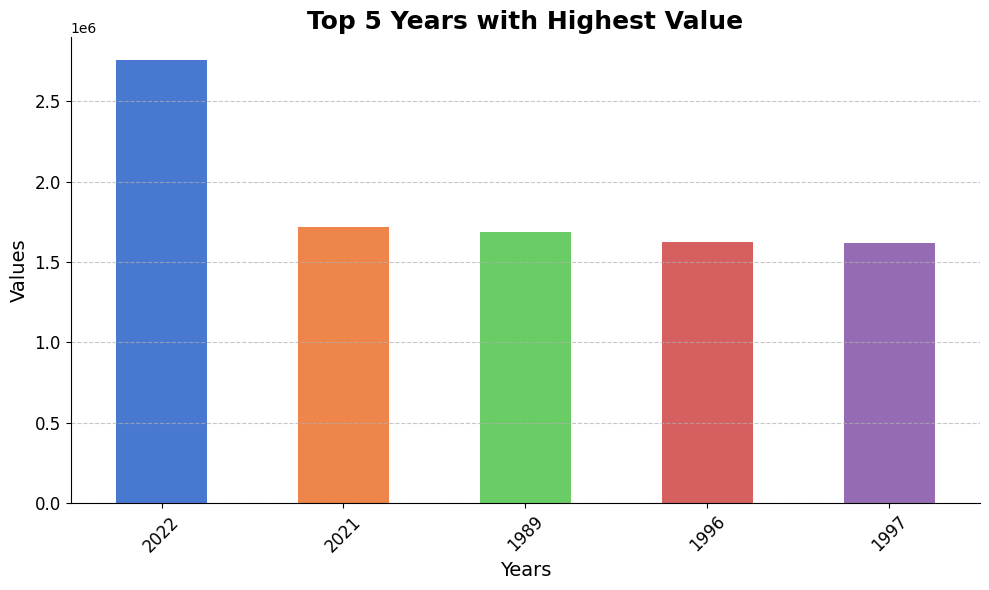

In [9]:
# Convert 'Value' column to numeric, forcing errors to NaN
health['Value'] = pd.to_numeric(health['Value'], errors='coerce')

# Drop rows with NaN values in 'Value' column
health.dropna(subset=['Value'], inplace=True)

# Define a custom color palette
colors = sns.color_palette('muted')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Group by Year and calculate the mean value, then select top 5 years with highest value
topYear = health.groupby('Year')['Value'].mean().nlargest(5)

# Plotting bar chart
topYear.plot(kind='bar', color=colors, ax=ax)

# Title and labels
plt.title('Top 5 Years with Highest Value', fontsize=18, fontweight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

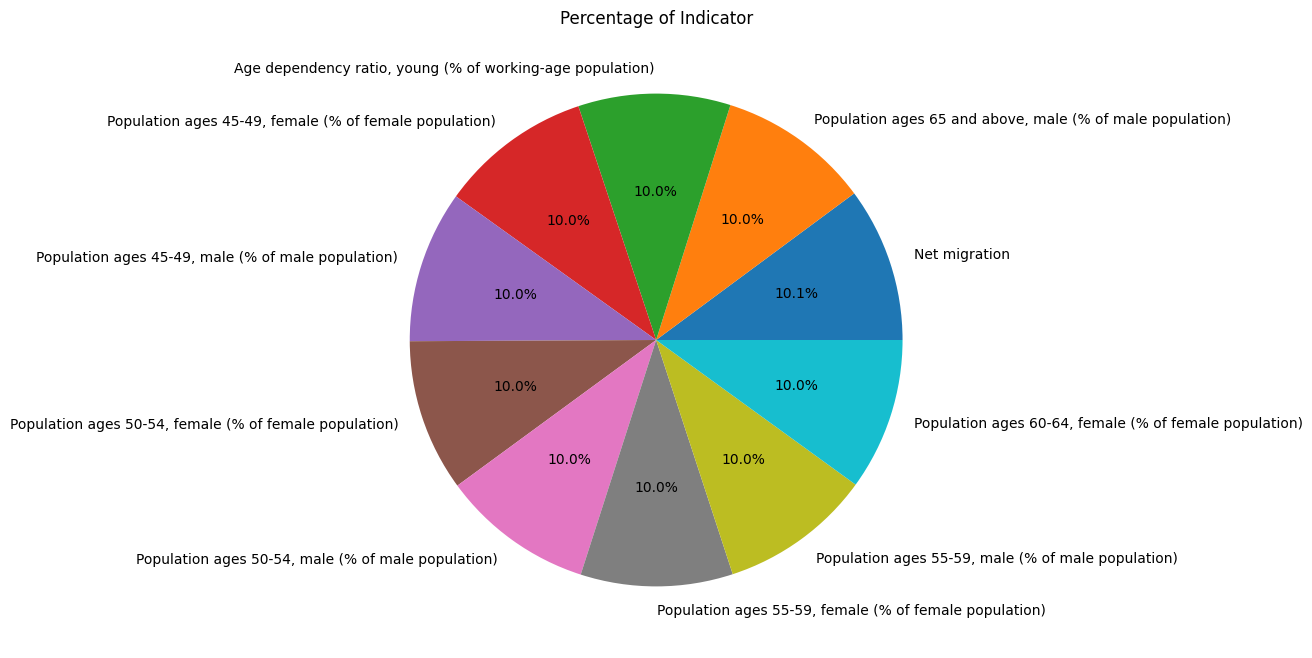

In [10]:
# 2. Pie chart for percentage of regions lacking basic services
plt.figure(figsize=(8, 8))
health['Indicator Name'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Indicator')
plt.ylabel('')
plt.show()

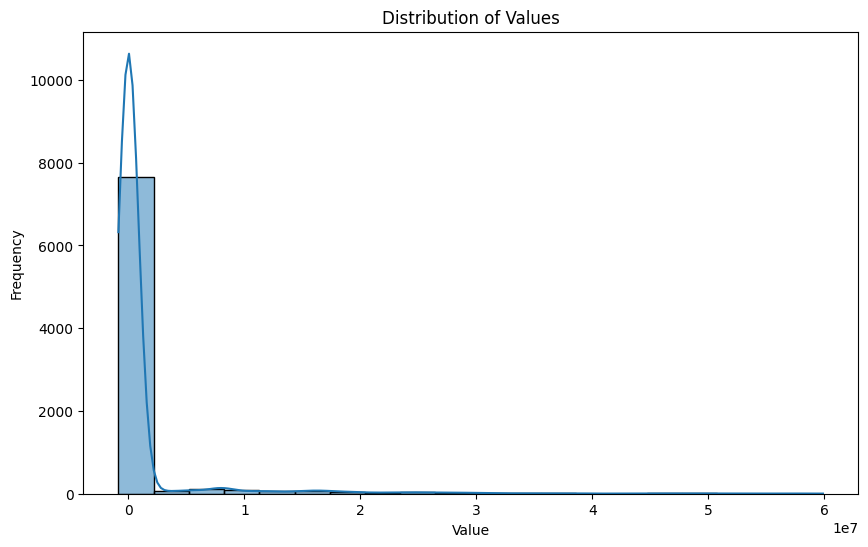

In [11]:
# 3. Histogram for distribution of Value
plt.figure(figsize=(10, 6))
sns.histplot(health['Value'], bins=20, kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

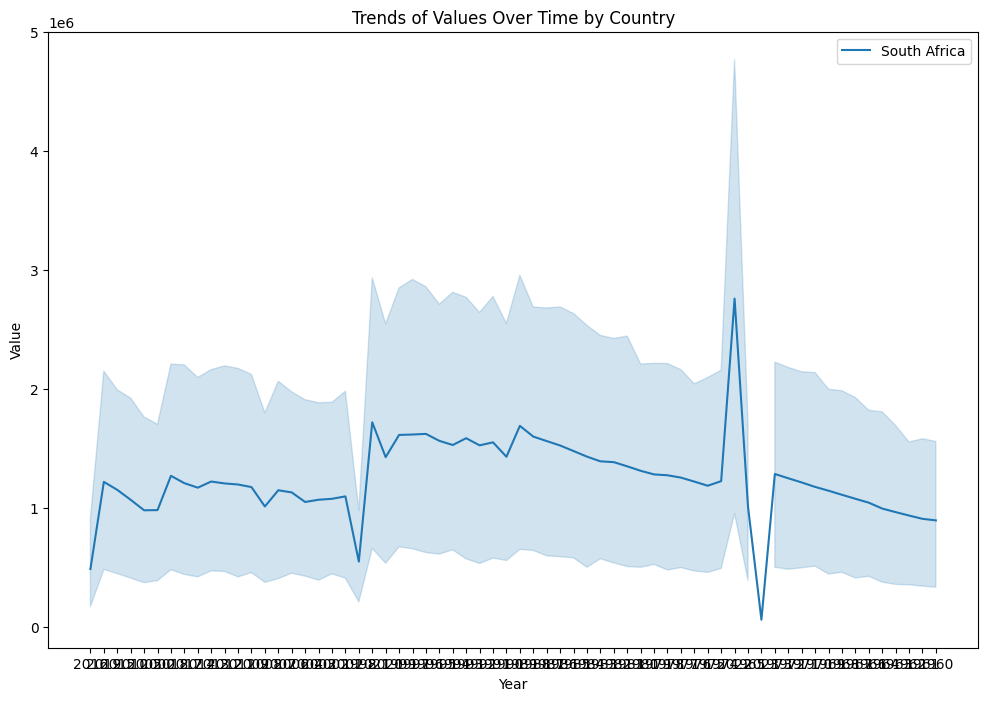

In [15]:
# Advanced Charts
# 4. Line plot to visualize trends over time for a specific country or indicator
plt.figure(figsize=(12, 8))
for country in health['Country Name'].unique():
    country_data = health[health['Country Name'] == country]
    sns.lineplot(x='Year', y='Value', data=country_data, label=country)
plt.title('Trends of Values Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

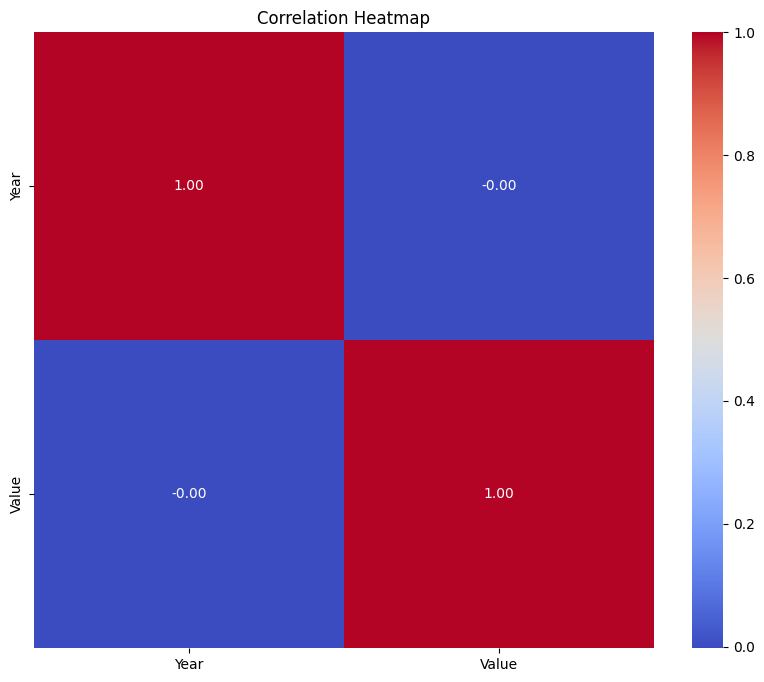

In [16]:
# 5. Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = health[['Year', 'Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()